<a href="https://colab.research.google.com/github/sengkununi/UAS_Visi_Komputer/blob/main/Fitur_Ekstraksi_Tekstur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sebelum kita memulai semuanya, mari kita mulai dengan mengimpor pustaka yang akan kita gunakan, seperti openCV, numpy, matplotlib, glob, dan skimage.

In [1]:
#masukkan library image yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

Langkah selanjutnya adalah mendefinisikan fungsi untuk metode yang akan kita eksekusi nanti. Fungsi pertama di bawah ini adalah fungsi <i>load_image()</i>. Tujuan dari fungsi ini adalah untuk memuat dataset/gambar dari komputer lokal dan menyimpannya ke dalam sebuah array. Nilai yang dikembalikan oleh fungsi ini adalah sebuah array gambar.

In [2]:
#membuat fungsi load_image
def load_image(arr):
    strr = "Datasets/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

Fungsi selanjutnya adalah fungsi <i>preprocessing()</i>. Fungsi ini bertujuan untuk memproses dataset kita menjadi gambar skala keabuan.

In [3]:
#membuat fungsi preprocessing
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

Fungsi selanjutnya yang harus didefinisikan adalah <i>extractLBP()</i>. Tujuan dari fungsi ini adalah mengembalikan 2 nilai. Nilai pertama adalah hasil ekstraksi tekstur dalam bentuk gambar. Dan nilai kedua adalah hasil ekstraksi tekstur dalam bentuk vektor.

In [4]:
#membuat fungsi extractLBP
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

Fungsi terakhir adalah <i> featureExtraction().</i> Fungsi ini bertujuan untuk mengembalikan array baru yang berisi tekstur yang diekstraksi, beserta vektornya.

In [5]:
#membuat fungsi featureextraction
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

Langkah selanjutnya adalah memuat dataset dan menyimpannya dalam array

In [6]:
#memuat dataset
data=[]
data=load_image(data)

Setelah memuat dataset, lalu melakukan proses rubah gambar ke greyscale

In [7]:
#merubah gambar yang diuplod ke greyscale
dataPreprocessed = preprocessing(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Tahap terakhir adalah mendapatkan hasil ekstraksi tekstur

In [8]:
#mendapatkan hasil ekstraksi
dataExtracted,vector = featureExtraction(dataPreprocessed)

Extraction Result


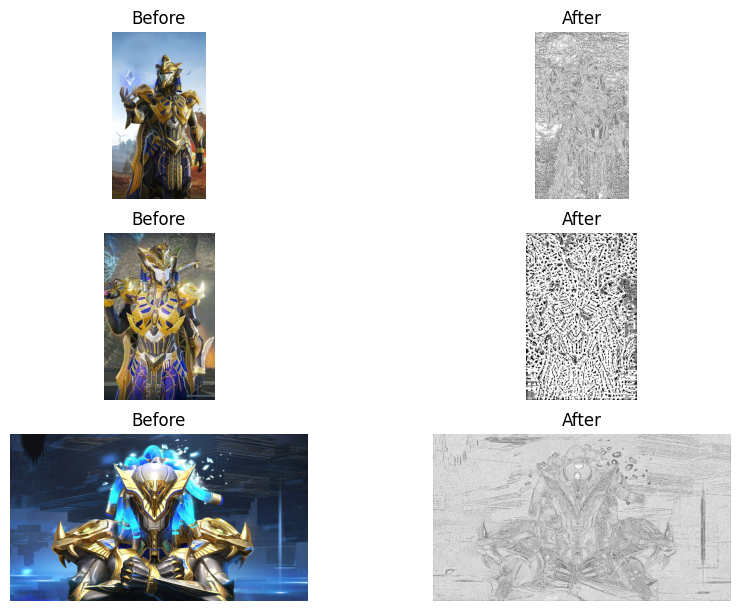

In [ ]:
#menampilkan hasi ekstraksi tekstur
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1])

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

In [9]:
#cetak vektor gambar
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [0.02793798 0.02020936 0.01682551 0.01208567 0.00884285 0.00838998
 0.00779257 0.01084093 0.01360547 0.01771987 0.02213472 0.03612036
 0.05294324 0.0594096  0.02333917 0.03850473 0.01824194 0.03522775
 0.01876226 0.01730992 0.0153609  0.01818062 0.02254205 0.02298704
 0.13569026 0.31899527]

Vector of Image 2 : [0.05954372 0.03551521 0.02404842 0.01616499 0.01248208 0.01041169
 0.00941631 0.01088947 0.01206402 0.01351728 0.01574693 0.01966874
 0.02562112 0.023491   0.01266125 0.01325848 0.0093964  0.00995381
 0.0093964  0.009914   0.01124781 0.01532887 0.02402851 0.034699
 0.06117614 0.50035834]

Vector of Image 3 : [0.05532175 0.04078757 0.01793844 0.01001296 0.00720735 0.00601886
 0.00544811 0.00584058 0.00649151 0.00821756 0.0113403  0.01967423
 0.02813143 0.02014188 0.01082307 0.00793428 0.00600626 0.00538187
 0.00501163 0.00547778 0.00669039 0.01048115 0.01973072 0.04259191
 0.07249694 0.56480149]
